In [1]:
import torch

In [2]:
x = torch.tensor(
    [[1., 2., 3., 4.],
     [5., 6., 7., 8.],
     [9., 10., 11., 12.]],
    requires_grad=True)
x

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]], requires_grad=True)

# [TORCH.TENSOR.REQUIRES_GRAD_](https://pytorch.org/docs/stable/generated/torch.Tensor.requires_grad_.html)

In [3]:
# Chech whether GPU is available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [4]:
x = x.to(device)
x

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]], requires_grad=True)

# [TORCH.TENSOR.TO](https://pytorch.org/docs/stable/generated/torch.Tensor.requires_grad_.html)

In [5]:
function = 10 * (x ** 2).sum()
function.backward()
print(x.grad, '<- gradient')

tensor([[ 20.,  40.,  60.,  80.],
        [100., 120., 140., 160.],
        [180., 200., 220., 240.]]) <- gradient


# [TORCH.TENSOR.BACKWARD](https://pytorch.org/docs/stable/generated/torch.Tensor.backward.html)

In [6]:
# Last and pre-last operations
print(function.grad_fn)
print(function.grad_fn.next_functions[0][0])

In [7]:
# Find gradient
x.data -= 0.001 * x.grad
x.data

tensor([[ 0.9800,  1.9600,  2.9400,  3.9200],
        [ 4.9000,  5.8800,  6.8600,  7.8400],
        [ 8.8200,  9.8000, 10.7800, 11.7600]])

In [8]:
x.grad.zero_()

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

# Task 1

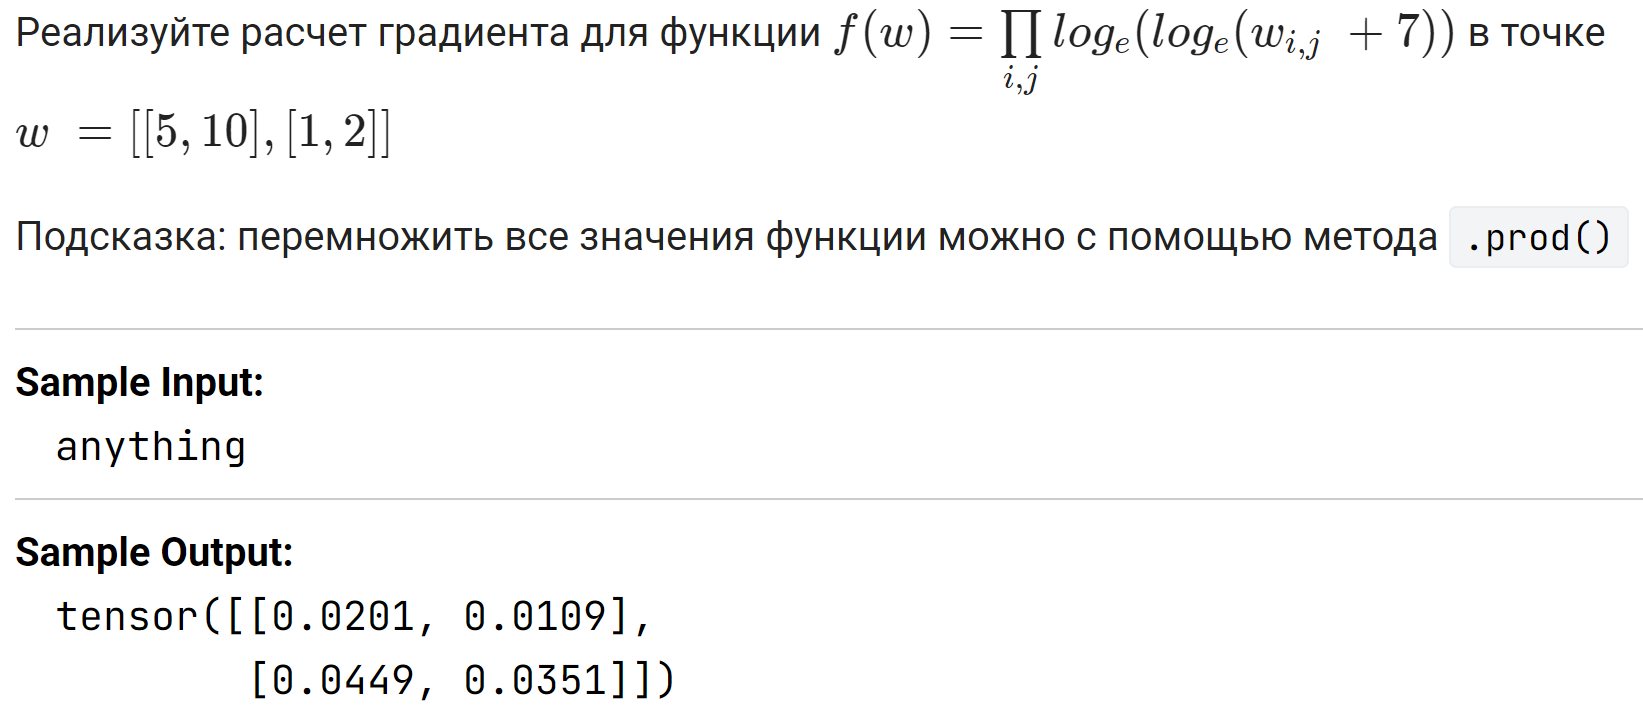

In [9]:
import torch

w = torch.tensor([[5., 10.], [1., 2.]], requires_grad=True)

function = torch.prod(torch.log(torch.log(w + 7)))
function.backward()

print(w.grad)

tensor([[0.0201, 0.0109],
        [0.0449, 0.0351]])


# [TORCH.TENSOR.BACKWARD](https://pytorch.org/docs/stable/generated/torch.Tensor.backward.html)

x.data is the same tensor as x but it's requires_grad=False

# Task 2

`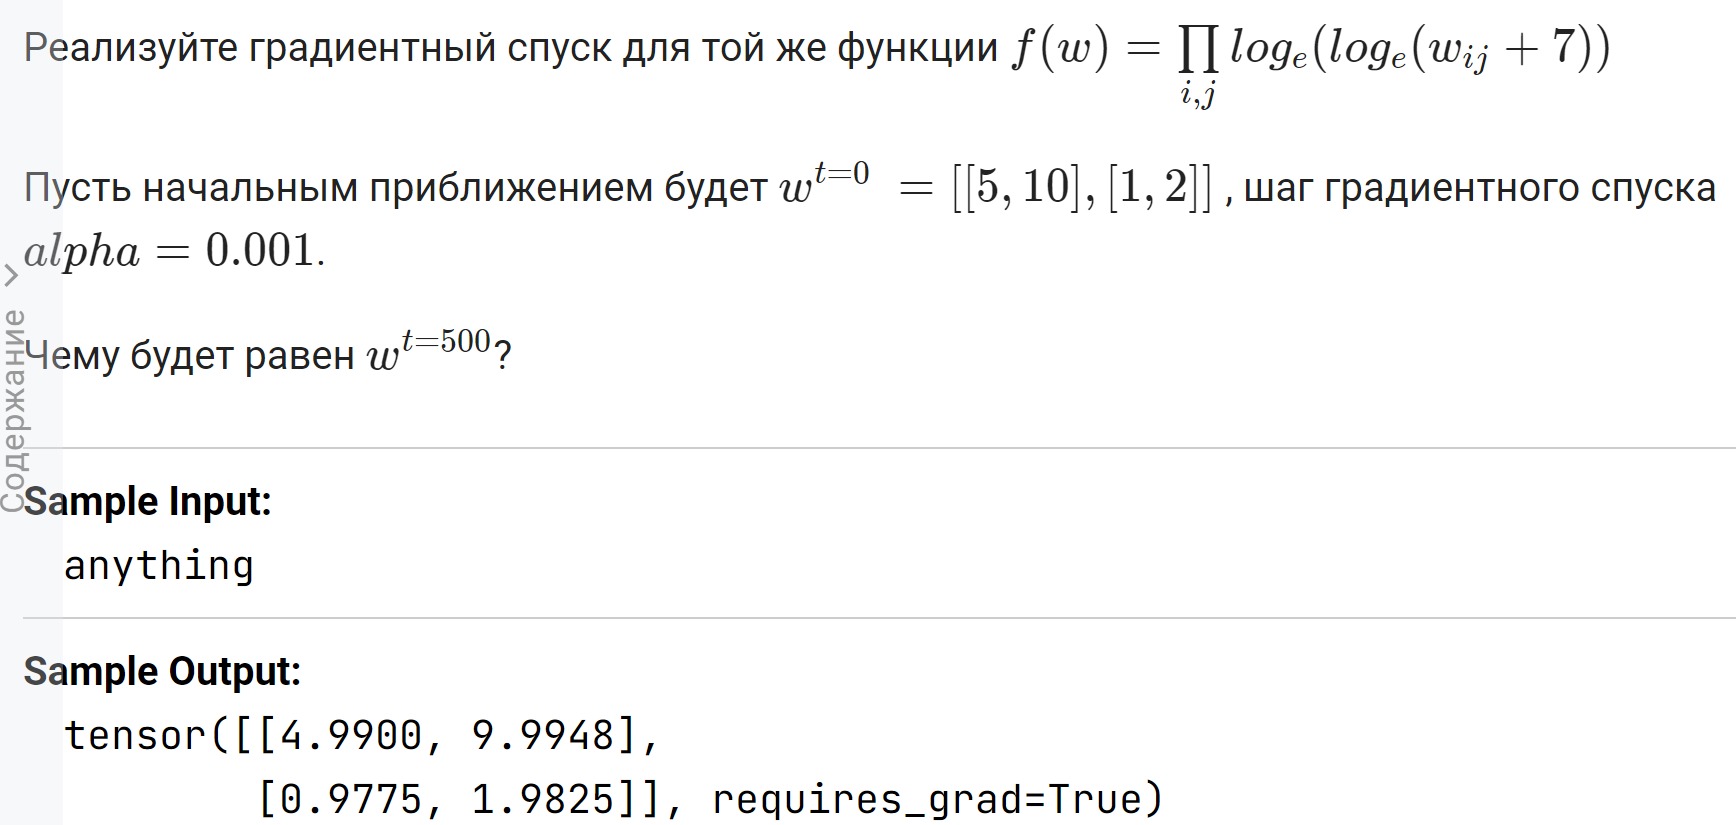

In [10]:
import torch

w = torch.tensor([[5., 10.], [1., 2.]], requires_grad=True)
alpha = 0.001

for _ in range(500):
    function = (w + 7).log().log().prod()
    function.backward()
    w.data -= alpha * w.grad
    # clean w.grad for each iteration
    w.grad.zero_()  # _() mean to clean current object

print(w)

tensor([[4.9900, 9.9948],
        [0.9775, 1.9825]], requires_grad=True)


# [TORCH.PROD](https://pytorch.org/docs/stable/generated/torch.prod.html)

In [11]:
# Example of functions for Grad Dens without optimizer
import torch

x = torch.tensor(data=[8., 8.], requires_grad=True)

# Loss function
def function_parabola(variable):
    return 10 * (variable ** 2).sum()


def make_gradient_step(function, variable):
    function_result = function(variable)
    # print(variable.grad) # first: None, then: tensor([0., 0.])
    function_result.backward()
    # print(variable.grad)  # derivative
    variable.data -= 0.001 * variable.grad
    # print(variable.data)  # x after GD iteration
    variable.grad.zero_()
    

for i in range(500):
    make_gradient_step(function_parabola, x)
print(x)

tensor([0.0003, 0.0003], requires_grad=True)


In [12]:
# Example of functions for Grad Dens with optimizer
import torch

x = torch.tensor(data=[8., 8.], requires_grad=True)
# Add optimizer from pocket torch.optim
optimizer = torch.optim.SGD(params=[x], lr=0.001)

# Loss function
def function_parabola(variable):
    return 10 * (variable ** 2).sum()


def make_gradient_step(function, variable):
    function_result = function(variable)
    function_result.backward()
    optimizer.step()
    optimizer.zero_grad()
    

for i in range(500):
    make_gradient_step(function_parabola, x)
print(x)

tensor([0.0003, 0.0003], requires_grad=True)


In PyTorch the gradient is cumulative by default, so you need .grad.zero_() to reset it

# Task 3

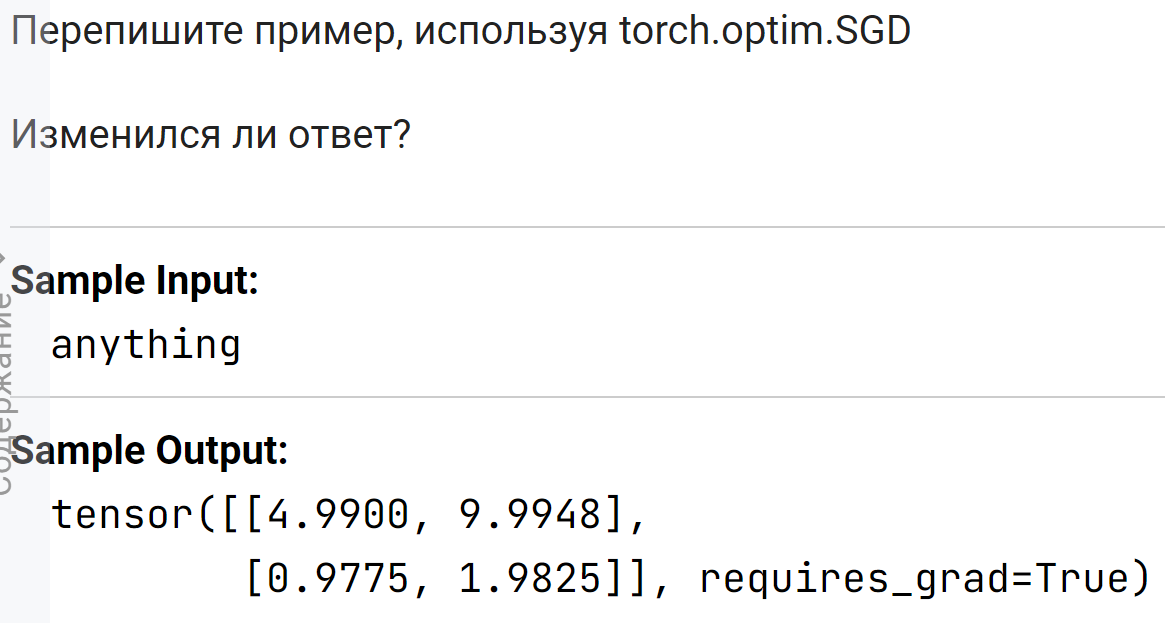

In [13]:
import torch

w = torch.tensor([[5., 10.], [1., 2.]], requires_grad=True)
alpha = 0.001
optimizer = torch.optim.SGD(params=[w], lr=alpha)

for _ in range(500):
    function = (w + 7).log().log().prod()
    function.backward()
    optimizer.step()
    optimizer.zero_grad()
    
print(w)

tensor([[4.9900, 9.9948],
        [0.9775, 1.9825]], requires_grad=True)
